# Use different ML Algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data/Real-Data/Combined_Data.csv')

In [5]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


<AxesSubplot:>

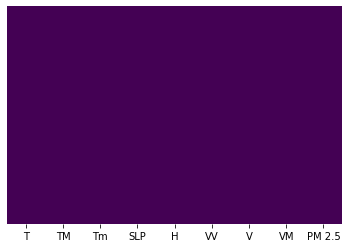

In [7]:
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

In [10]:
df.shape

(1052, 9)

In [11]:
df = df.dropna()

In [12]:
df.shape

(1050, 9)

In [13]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

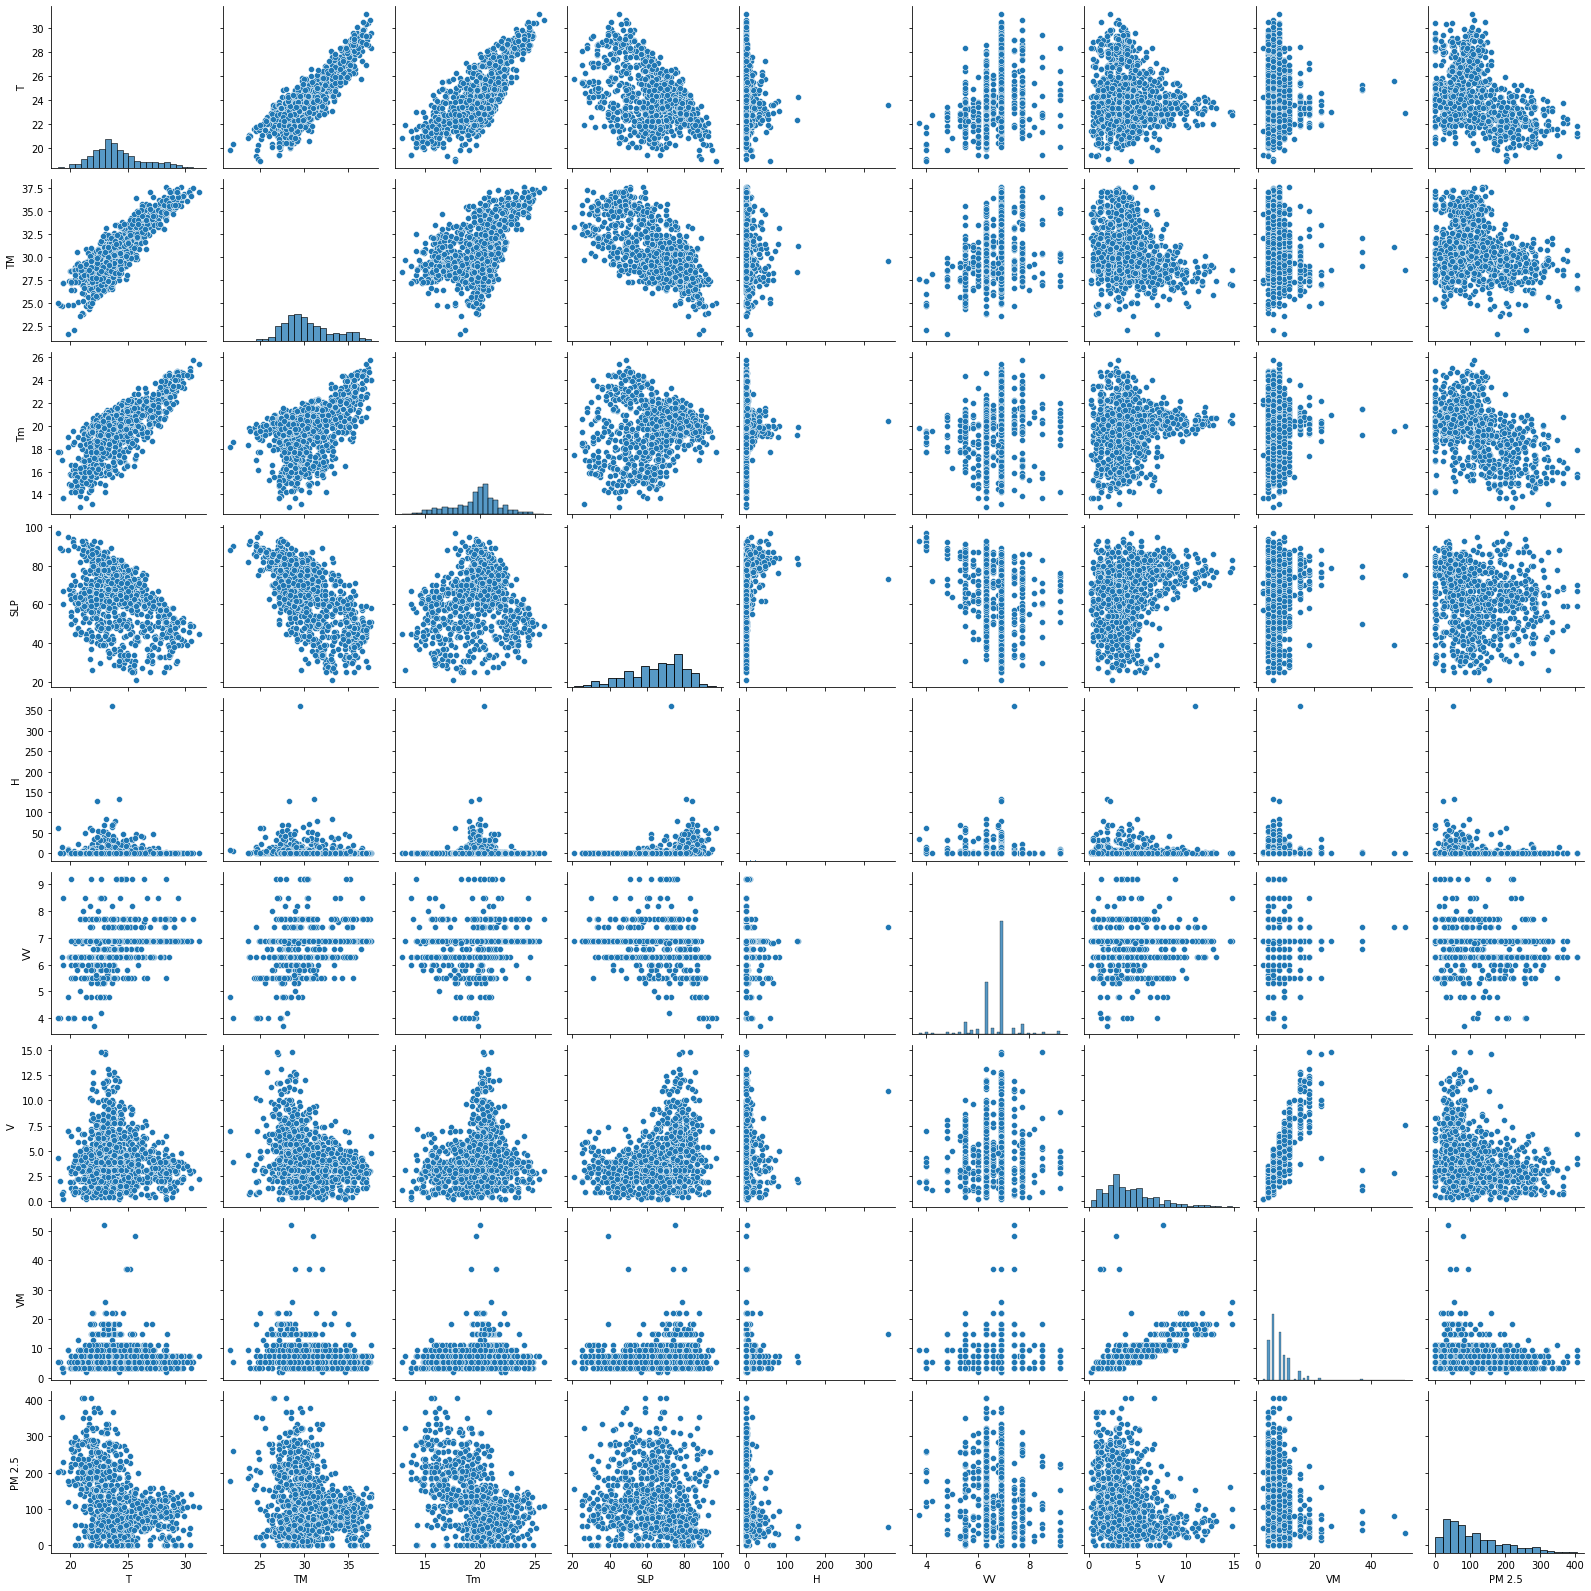

In [17]:
sns.pairplot(df)

In [18]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.870933,0.756049,-0.455650,-0.068074,0.329765,-0.104919,-0.062471,-0.357754
TM,0.870933,1.000000,0.478080,-0.640897,-0.067658,0.300554,-0.280032,-0.193654,-0.178102
Tm,0.756049,0.478080,1.000000,0.154076,0.032512,0.138944,0.164659,0.138632,-0.518702
SLP,-0.455650,-0.640897,0.154076,1.000000,0.225912,-0.280485,0.347151,0.255047,-0.208450
H,-0.068074,-0.067658,0.032512,0.225912,1.000000,-0.065342,0.012060,0.011457,-0.117060
VV,0.329765,0.300554,0.138944,-0.280485,-0.065342,1.000000,0.049522,0.041429,-0.130109
V,-0.104919,-0.280032,0.164659,0.347151,0.012060,0.049522,1.000000,0.702252,-0.322936
VM,-0.062471,-0.193654,0.138632,0.255047,0.011457,0.041429,0.702252,1.000000,-0.262410
PM 2.5,-0.357754,-0.178102,-0.518702,-0.208450,-0.117060,-0.130109,-0.322936,-0.262410,1.000000


In [19]:
corrmat = df.corr()
top_corr_features = corrmat.index

top_corr_features

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

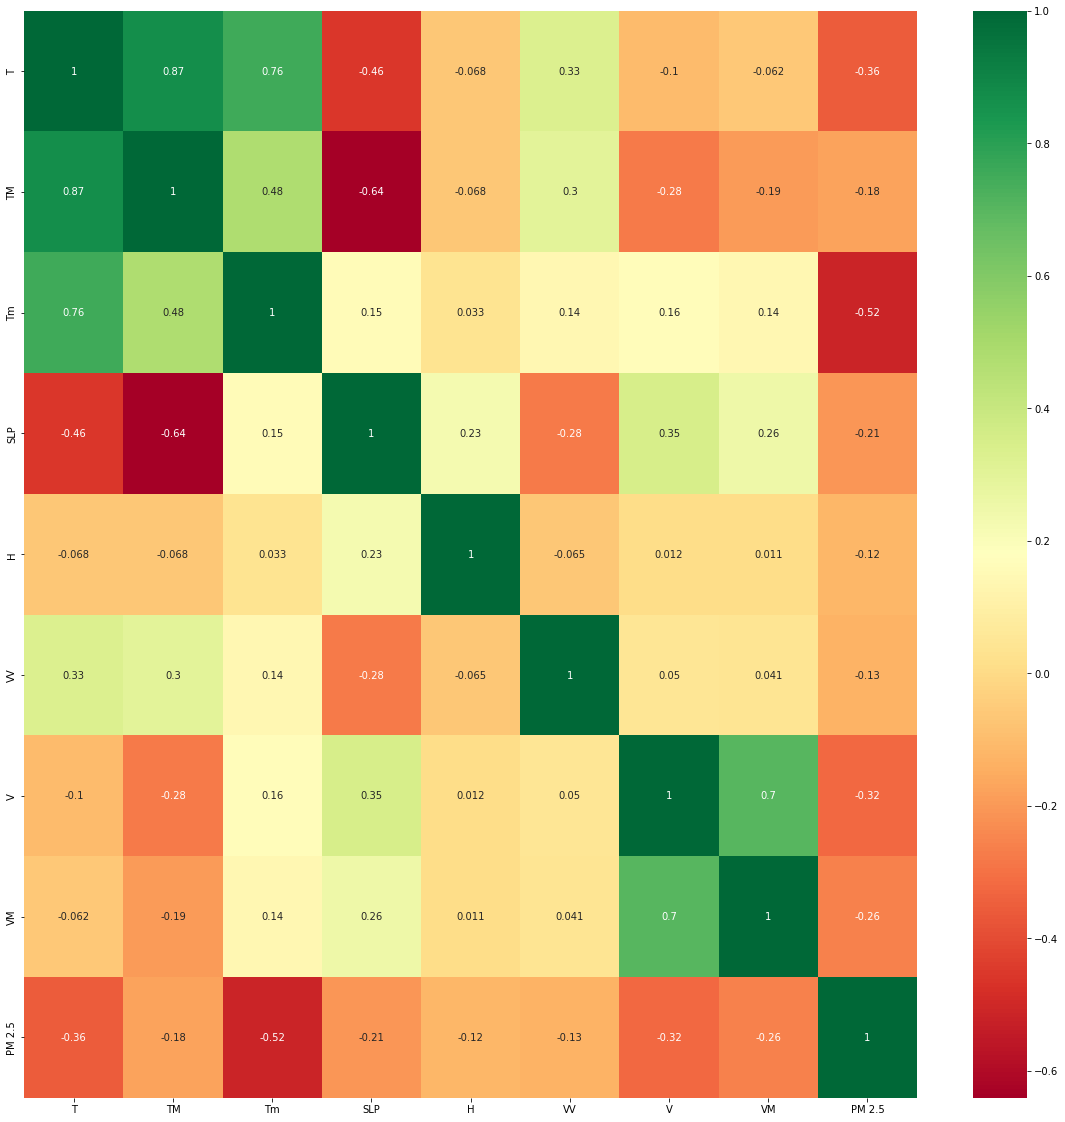

In [20]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Feature Importance section

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [23]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4


In [24]:
print(model.feature_importances_)

[0.17656947 0.10537362 0.300864   0.115263   0.0490684  0.06133892
 0.12525287 0.06626972]


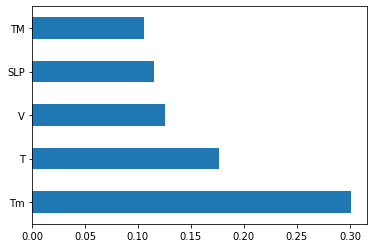

In [28]:
featu_importances = pd.Series(model.feature_importances_ , index=X.columns)
featu_importances.nlargest(5).plot(kind='barh')
plt.show()

In [29]:
featu_importances

T      0.176569
TM     0.105374
Tm     0.300864
SLP    0.115263
H      0.049068
VV     0.061339
V      0.125253
VM     0.066270
dtype: float64

# Linear Regression

/Users/wilson/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

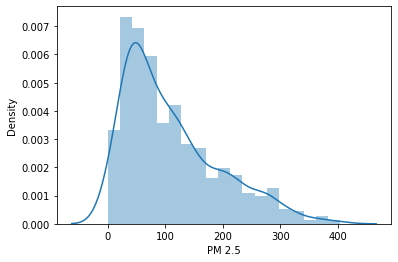

In [31]:
sns.distplot(Y)

# Train Test split

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [34]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [35]:
regressor.coef_

array([-18.55068482,  -0.90349045,  -1.45410975,  -1.89775466,
        -0.29047469,  -1.75110238,  -7.7453264 ,  -1.30235797])

In [36]:
regressor.intercept_

790.8094533812998

In [37]:
regressor.score(X_train,Y_train)

0.3817289061222877

In [38]:
regressor.score(X_test,Y_test)

0.3178157652500001

In [40]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,Y,cv=5)

In [42]:
score.mean()

0.3093033796322154

In [43]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-18.550685
TM,-0.903490
Tm,-1.454110
SLP,-1.897755
H,-0.290475
VV,-1.751102
V,-7.745326
VM,-1.302358


In [44]:
predicted = regressor.predict(X_test)

/Users/wilson/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

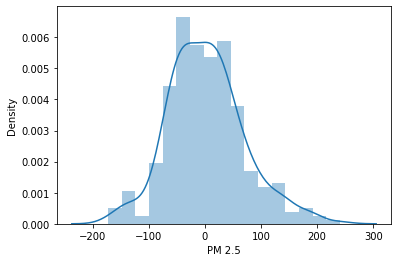

In [45]:
sns.distplot(Y_test-predicted)

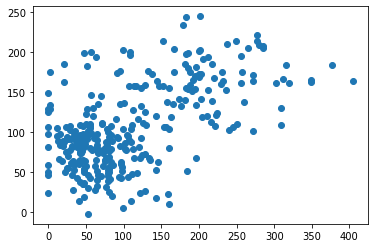

In [46]:
plt.scatter(Y_test,predicted)

# Metrics for evaluation

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(Y_test, predicted))
print('MSE:', metrics.mean_squared_error(Y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predicted)))

MAE: 52.522683005464785
MSE: 4597.950177636613
RMSE: 67.8081866564548
